In [1]:
#
import os
os.chdir('/Users/marcb/Desktop')
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2010.csv"
infile2 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2011.csv"
infile3 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2012.csv"
infile4 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2013.csv"
infile5 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2014.csv"
infile6 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2015.csv"
infile7 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2016.csv"
infile8 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2017.csv"
infile9 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/mc_pit2_2018.csv"

infile10 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/MC2co2o2_2013.csv" 
infile11 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/MC2co2o2_2014.csv" 
infile12 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/MC2co2o2_2015.csv" 
infile13 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/MC2co2o2_2016.csv" 
infile14 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/MC2co2o2_2017.csv" 
infile15 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/Redox_MC_Pit2_2015.csv" 
infile16 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/Redox_MC_Pit2_2016.csv" 
infile17 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/Redox_MC_Pit2_2017.csv" 
infile18 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/Redox_MC_Pit2_2018.csv" 
infile19 = "CO2 Data/raw_data/Catalina-Jemez/MC_Pit2/Redox_MC_Pit2_2014.csv" 


df1 = pd.read_csv(infile1, na_values='NAN',  parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN',  parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN',  parse_dates=[0], index_col=0) 
df5 = pd.read_csv(infile5, na_values='NAN',  parse_dates=[0], index_col=0) 
df6 = pd.read_csv(infile6, na_values='NAN',  parse_dates=[0], index_col=0) 
df7 = pd.read_csv(infile7, na_values='NAN',  parse_dates=[0], index_col=0) 
df8 = pd.read_csv(infile8, na_values='NAN',  parse_dates=[0], index_col=0) 
df9 = pd.read_csv(infile9, na_values='NAN',  parse_dates=[0], index_col=0) 
df10 = pd.read_csv(infile10, na_values='NAN',  parse_dates=[0], index_col=0) 
df11 = pd.read_csv(infile11, na_values='NAN',  parse_dates=[0], index_col=0) 
df12 = pd.read_csv(infile12, na_values='NAN',  parse_dates=[0], index_col=0) 
df13 = pd.read_csv(infile13, na_values='NAN',  parse_dates=[0], index_col=0) 
df14 = pd.read_csv(infile14, na_values='NAN',  parse_dates=[0], index_col=0) 
df15 = pd.read_csv(infile15, na_values='NAN',  parse_dates=[0], index_col=0) 
df16 = pd.read_csv(infile16, na_values='NAN',  parse_dates=[0], index_col=0) 
df17 = pd.read_csv(infile17, na_values='NAN',  parse_dates=[0], index_col=0) 
df18 = pd.read_csv(infile18, na_values='NAN',  parse_dates=[0], index_col=0) 
df19 = pd.read_csv(infile18, na_values='NAN',  parse_dates=[0], index_col=0) 


#df9 = pd.read_csv(infile9, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit1_ORP_5','Pit1_ORP_10','Pit1_ORP_30','Pit1_ORP_60']) 


In [3]:
df1=df1.drop(['[MST]'])
df2=df2.drop(['[MST]'])
df3=df3.drop(['[MST]'])
df4=df4.drop(['[MST]'])
df5=df5.drop(['[MST]'])
df6=df6.drop(['[MST]'])
df7=df7.drop(['[MST]'])
df8=df8.drop(['[MST]'])
df9=df9.drop(['[MST]'])
df10=df10.drop(['MST'])
df11=df11.drop(['MST'])
df12=df12.drop(['MST'])
df13=df13.drop(['MST'])
df14=df14.drop(['MST'])
df15=df15.drop(['MST'])
df16=df16.drop(['MST'])
df17=df17.drop(['MST'])
df18=df18.drop(['MST'])
df19=df19.drop(['MST'])

df4

,VWC9.5cm,Temp9.5cm,EC9.5cm,VWC44cm,Temp44cm,EC44cm,VWC65cm,Temp65cm,EC65cm,Voltage11cm,Voltage45cm
DateTime,,,,,,,,,,,
1/1/2013 0:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1/1/2013 0:10,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1/1/2013 0:20,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1/1/2013 0:30,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1/1/2013 0:40,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...
12/31/2013 23:10,0.231,0.8,0.15,0.226,2.4,0.03,0.243,3.0,0.08,755.1,800.5
12/31/2013 23:20,0.231,0.8,0.14,0.226,2.4,0.04,0.243,3.0,0.07,755.9,800.5
12/31/2013 23:30,0.231,0.8,0.15,0.226,2.4,0.03,0.243,3.0,0.08,756.6,800.5


In [4]:
#df9=df9.loc[0:4]
df10


,Temp_Avg(2cm),Temp_Avg(10cm),Temp_Avg(30cm),Temp_Avg(60cm),O2_Avg(2cm),O2_Avg(10cm),O2_Avg(30cm),O2_Avg(60cm),CO2_Avg(2cm),CO2_Avg(10cm),CO2_Avg(30cm),CO2_Avg(60cm)
TIMESTAMP,,,,,,,,,,,,
8/3/2013 13:45,14.09131,12.99734,11.84837,10.88731,13.83784,12.12684,13.2412,12.97886,666.83,4459.866,11198,9811.843
8/3/2013 14:00,14.43426,13.21137,12.03334,11.03599,13.80794,12.12389,13.24044,12.97756,666.9779,4486.103,11013.55,9633.699
8/3/2013 14:15,14.80104,13.35326,12.09878,11.08159,13.79262,12.11903,13.23779,12.9755,679.6205,4511.913,11022.56,9627.488
8/3/2013 14:30,14.99744,13.45613,12.12775,11.09977,13.79004,12.11387,13.23472,12.9728,686.3365,4549.377,11007.89,9592.442
8/3/2013 14:45,15.10085,13.53431,12.14527,11.11394,13.78288,12.10917,13.23168,12.9699,684.488,4576.749,11037.53,9595.81
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2013 22:45,-0.7422068,0.1589417,1.389355,2.320045,13.7036,12.47993,13.22982,13.11545,386.9964,21.97802,2810.257,45.23809
12/31/2013 23:00,-0.7641256,0.1552205,1.382902,2.319767,13.70518,12.48019,13.23435,13.11547,383.1502,21.52015,2698.535,44.87179
12/31/2013 23:15,-0.7835693,0.1434285,1.379802,2.316293,13.70632,12.48077,13.23521,13.11453,382.0471,22.16094,2931.287,44.87135


In [5]:
df18

,Pit2_ORP_5,Pit2_ORP_10,Pit2_ORP_30,Pit2_ORP_60
TIMESTAMP,,,,
1/1/2018 0:00,201.5,236.7,271.6,73.78
1/1/2018 0:15,201.5,236.4,271.6,73.78
1/1/2018 0:30,201.5,236.4,271.6,73.78
1/1/2018 0:45,201.5,236.4,271.6,73.78
1/1/2018 1:00,201.5,236.4,271.6,73.78
...,...,...,...,...
12/31/2018 22:45,107.7,125.2,91.3,67.37
12/31/2018 23:00,107.7,125.5,91.3,67.37
12/31/2018 23:15,107.7,125.5,91.3,67.37


In [6]:
pd.set_option('display.max_columns', None)

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11, df12, df13, df14, df15, df16, df17, df18, df19], sort=False)
df.columns=['SoilMoisture_9.5cm.m3m3', 'Decagon5TETemp_9.5cm.deg.C', 'BulkEC_9.5cm.dS/m','SoilMoisture_44cm.m3m3', 'Decagon5TETemp_44cm.deg.C', 'BulkEC_44cm.dS/m','SoilMoisture_65cm.m3m3', 'Decagon5TETemp_65cm.deg.C', 'BulkEC_65cm.dS/m', 'Voltage_11cm.mV', 'Voltage_44cm.mV', 'ApogeeTemp_2cm.deg.C','ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'O2_2cm.percent.0-100', 'O2_10cm.percent.0-100', 'O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'CO2_2cm.ppm', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'ReductionPotential_5cm.mV','ReductionPotential_10cm.mV','ReductionPotential_30cm.mV','ReductionPotential_60cm.mV' ]
df

,SoilMoisture_9.5cm.m3m3,Decagon5TETemp_9.5cm.deg.C,BulkEC_9.5cm.dS/m,SoilMoisture_44cm.m3m3,Decagon5TETemp_44cm.deg.C,BulkEC_44cm.dS/m,SoilMoisture_65cm.m3m3,Decagon5TETemp_65cm.deg.C,BulkEC_65cm.dS/m,Voltage_11cm.mV,Voltage_44cm.mV,ApogeeTemp_2cm.deg.C,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,O2_2cm.percent.0-100,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,CO2_2cm.ppm,CO2_10cm.ppm,CO2_30cm.ppm,CO2_60cm.ppm,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV
9/17/2010 15:40,-0.008,21.3,0,-0.012,21.6,0,-0.015,21.4,0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 15:50,-0.008,21.2,0,-0.011,21.5,0,-0.015,21.2,0,560.29,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:00,-0.008,21,0,-0.011,21.2,0,-0.015,20.9,0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:10,-0.008,20.8,0,-0.011,21.1,0,-0.015,20.8,0,559.55,574.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:20,-0.008,20.8,0,-0.01,21,0,-0.015,20.7,0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2018 22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.2,91.3,67.37
12/31/2018 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.5,91.3,67.37
12/31/2018 23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.5,91.3,67.37
12/31/2018 23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.2,91.3,67.03


In [7]:
#Corrections to whole DataFrame

df=df.astype(float)
df.mask(df<=-0.01, inplace=True)


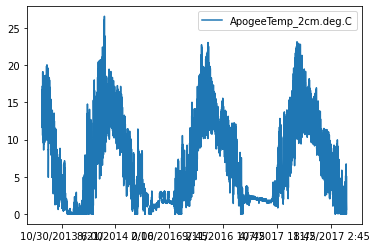

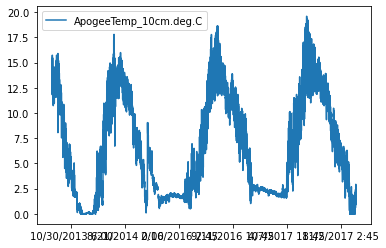

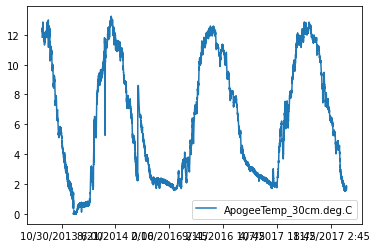

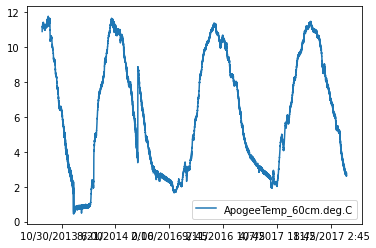

In [8]:
plt.show()
df.plot(use_index=True, y='ApogeeTemp_2cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_10cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_30cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60cm.deg.C')

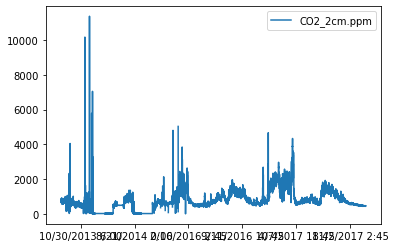

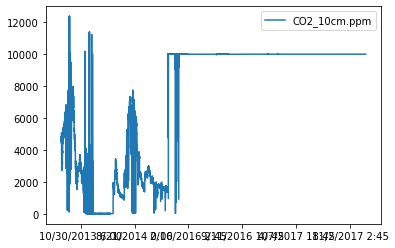

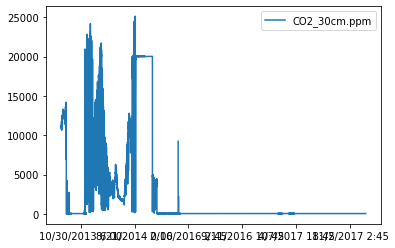

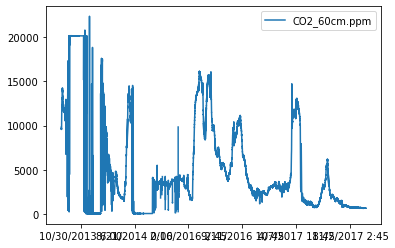

In [9]:
#Plot CO2 data


plt.show()
df.plot(use_index=True, y='CO2_2cm.ppm')
df.plot(use_index=True, y='CO2_10cm.ppm')
df.plot(use_index=True, y='CO2_30cm.ppm')
df.plot(use_index=True, y='CO2_60cm.ppm')





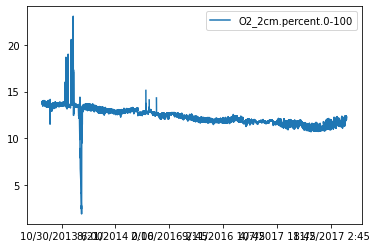

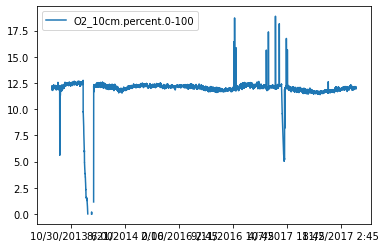

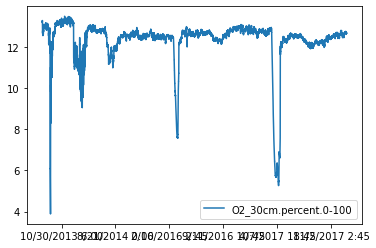

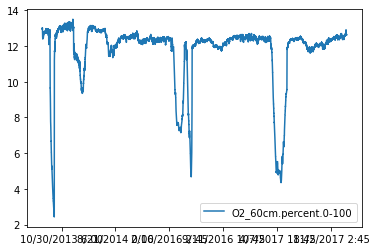

In [10]:
plt.show()
df.plot(use_index=True, y='O2_2cm.percent.0-100')
df.plot(use_index=True, y='O2_10cm.percent.0-100')
df.plot(use_index=True, y='O2_30cm.percent.0-100')
df.plot(use_index=True, y='O2_60cm.percent.0-100')

In [11]:
#plt.show()
#df.plot(use_index=True, y='WaterPotential_10cm.kPa')
#df.plot(use_index=True, y='WaterPotential_30cm.kPa')

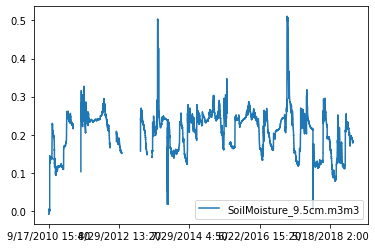

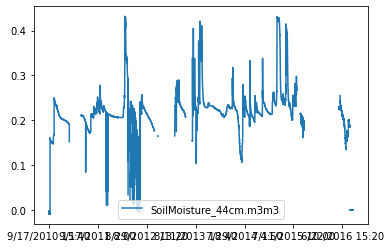

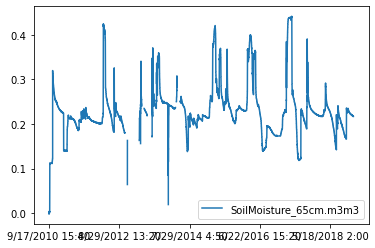

In [12]:
plt.show()
df.plot(use_index=True, y='SoilMoisture_9.5cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_44cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_65cm.m3m3')


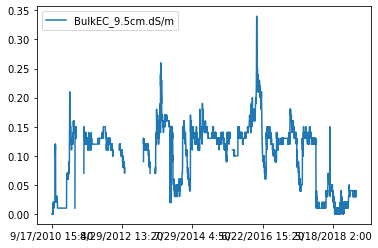

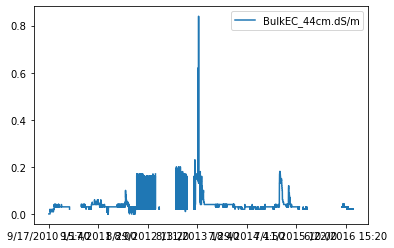

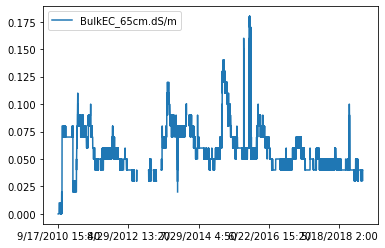

In [13]:
plt.show()
df.plot(use_index=True, y='BulkEC_9.5cm.dS/m')
df.plot(use_index=True, y='BulkEC_44cm.dS/m')
df.plot(use_index=True, y='BulkEC_65cm.dS/m')


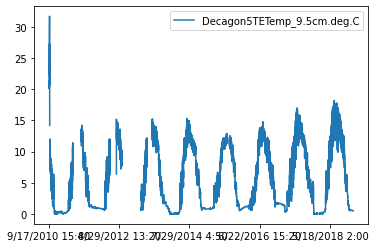

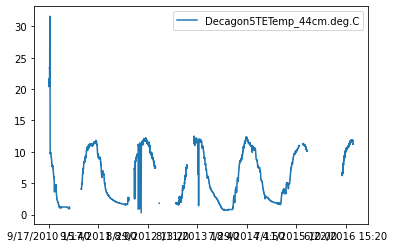

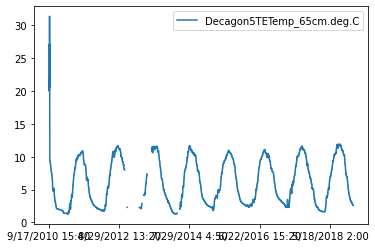

In [14]:
plt.show()
df.plot(use_index=True, y='Decagon5TETemp_9.5cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_44cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_65cm.deg.C')


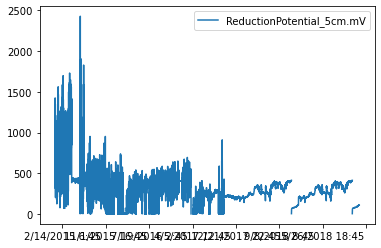

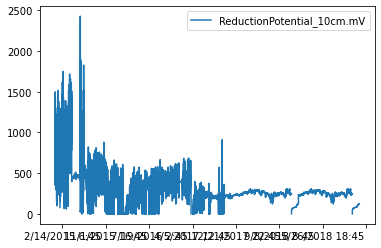

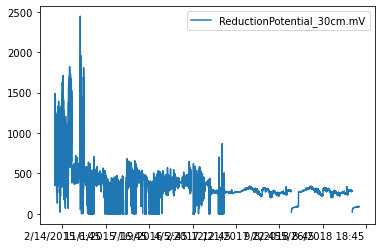

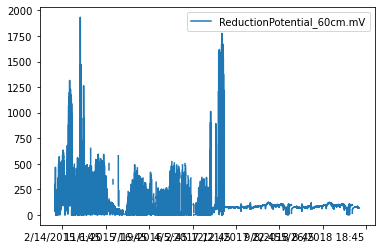

In [15]:
plt.show()
df.plot(use_index=True, y='ReductionPotential_5cm.mV')
df.plot(use_index=True, y='ReductionPotential_10cm.mV')
df.plot(use_index=True, y='ReductionPotential_30cm.mV')
df.plot(use_index=True, y='ReductionPotential_60cm.mV')

In [16]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Catalina-Jemez/MC_Pit2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [17]:
output

,SoilMoisture_9.5cm.m3m3,Decagon5TETemp_9.5cm.deg.C,BulkEC_9.5cm.dS/m,SoilMoisture_44cm.m3m3,Decagon5TETemp_44cm.deg.C,BulkEC_44cm.dS/m,SoilMoisture_65cm.m3m3,Decagon5TETemp_65cm.deg.C,BulkEC_65cm.dS/m,Voltage_11cm.mV,Voltage_44cm.mV,ApogeeTemp_2cm.deg.C,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,O2_2cm.percent.0-100,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,CO2_2cm.ppm,CO2_10cm.ppm,CO2_30cm.ppm,CO2_60cm.ppm,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV
9/17/2010 15:40,-0.008,21.3,0.0,NaN,21.6,0.0,NaN,21.4,0.0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 15:50,-0.008,21.2,0.0,NaN,21.5,0.0,NaN,21.2,0.0,560.29,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:00,-0.008,21.0,0.0,NaN,21.2,0.0,NaN,20.9,0.0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:10,-0.008,20.8,0.0,NaN,21.1,0.0,NaN,20.8,0.0,559.55,574.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/17/2010 16:20,-0.008,20.8,0.0,NaN,21.0,0.0,NaN,20.7,0.0,559.55,573.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2018 22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.2,91.3,67.37
12/31/2018 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.5,91.3,67.37
12/31/2018 23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.5,91.3,67.37
12/31/2018 23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.7,125.2,91.3,67.03
